# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Ridho Mujahid
- **Email:** muhwmmadridho@gmail.com
- **ID Dicoding:** ridhomjhd

## 1. Menentukan Pertanyaan Bisnis

1. Produk mana yang paling banyak terjual? Apakah ada hubungan antara harga produk dan jumlah produk yang dijual?
2. Bagaimana distribusi geografis pelanggan dan penjual?

## 2. Import Semua Packages/Library yang Digunakan

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

## 3. Data Wrangling

### 3.1 Gathering Data

In [2]:
# Directory containing the CSV files
data_dir = "D:/Bangkit Academy/Dicoding/Belajar Analisis Data dengan Python/proyek_akhir/"

# opening datasets individually
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [3]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 3.2 Assessing Data
#### 3.2.1 Cek tipe data

In [12]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

#### 3.2.2 Cek NaN

In [13]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

#### 3.2.3 Cek duplikat

In [14]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geo,1000163,261831
category,71,0


### 3.3 Cleaning Data

#### 3.3.1 orders

In [15]:
# Mengisi nilai yang hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date dengan nilai yang sesuai
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'], inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_estimated_delivery_date'], inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_estimated_delivery_date'], inplace=True)

#### 3.3.3 products

In [16]:
products['product_category_name'].fillna('Unknown', inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].mean(), inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].mean(), inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].mean(), inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)

#### 3.3.5 reviews

In [17]:
# Mengisi nilai yang hilang pada kolom review_comment_title dan review_comment_message dengan string kosong
reviews['review_comment_title'].fillna('', inplace=True)
reviews['review_comment_message'].fillna('', inplace=True)

#### 3.3.8 geo

In [18]:
# remove duplicate data
data['geo'].drop_duplicates(inplace=True)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Explore items

In [19]:
# Melihat statistik deskriptif dari kolom harga produk (price)
price_stats = items['price'].describe()
print("Statistik Deskriptif Harga Produk:")
print(price_stats)
print("\n")

# Memeriksa apakah ada outlier dalam harga produk yang perlu diperhatikan
q1 = items['price'].quantile(0.25)
q3 = items['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = items[(items['price'] < lower_bound) | (items['price'] > upper_bound)]
if outliers.empty:
    print("Tidak ada outlier dalam harga produk yang perlu diperhatikan.")
else:
    print("Outlier dalam harga produk yang perlu diperhatikan:")
    print(outliers)

Statistik Deskriptif Harga Produk:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


Outlier dalam harga produk yang perlu diperhatikan:
                                order_id  order_item_id  \
7       000576fe39319847cbb9d288c5617fa6              1   
16      0009c9a17f916a706d71784483a5d643              1   
26      0011d82c4b53e22e84023405fb467e57              1   
30      00137e170939bba5a3134e2386413108              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
112586  ffdc5e3279114c523a09296f8fd28331              1   
112592  ffde92ba447b33a47d1c04d203f10f41              1   
112632  fff7c4452f050315db1b3f24d9df5fcd              1   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb          

### 4.2 Explore products

In [20]:
# Mengetahui jumlah produk yang unik dan kategori produk yang tersedia
jumlah_produk_unik = products['product_id'].nunique()
kategori_produk_tersedia = products['product_category_name'].nunique()
print("Jumlah produk unik:", jumlah_produk_unik)
print("Jumlah kategori produk yang tersedia:", kategori_produk_tersedia)

# Memeriksa korelasi antara fitur-fitur ini dan jumlah produk yang terjual
correlation = products[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].corrwith(items['order_item_id'])
print("Korelasi antara fitur produk dan jumlah produk yang terjual:")
print(correlation)

# Membuat visualisasi diagram batang untuk menunjukkan kategori produk yang paling banyak terjual
produk_terjual_per_kategori = items.merge(products[['product_id', 'product_category_name']], on='product_id')
produk_terjual_per_kategori = produk_terjual_per_kategori.groupby('product_category_name')['order_item_id'].sum().reset_index()
produk_terjual_per_kategori = produk_terjual_per_kategori.sort_values(by='order_item_id', ascending=False)

print("Kategori Produk yang Paling Banyak Terjual:")
print(produk_terjual_per_kategori.head(10))

Jumlah produk unik: 32951
Jumlah kategori produk yang tersedia: 74
Korelasi antara fitur produk dan jumlah produk yang terjual:
product_name_lenght           0.004237
product_description_lenght   -0.004442
product_photos_qty           -0.001784
dtype: float64
Kategori Produk yang Paling Banyak Terjual:
     product_category_name  order_item_id
14         cama_mesa_banho          13665
55        moveis_decoracao          11540
12            beleza_saude          11081
33           esporte_lazer           9932
45  informatica_acessorios           9874
73   utilidades_domesticas           9051
67      relogios_presentes           6594
41      ferramentas_jardim           5874
71               telefonia           5161
9               automotivo           4881


### 4.3 Explore payments

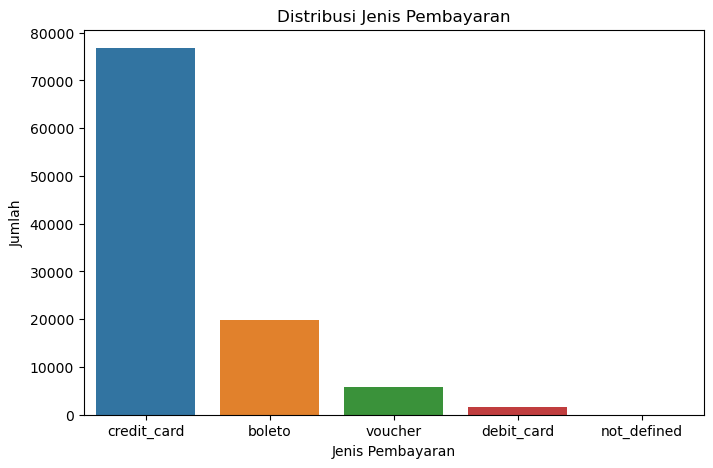

Statistik Pembayaran:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64
Korelasi antara metode pembayaran dan nilai pembayaran:
                      payment_sequential  payment_installments  payment_value
payment_sequential              1.000000             -0.086363      -0.069593
payment_installments           -0.086363              1.000000       0.330811
payment_value                  -0.069593              0.330811       1.000000


In [21]:
# Melihat distribusi jenis pembayaran
plt.figure(figsize=(8, 5))
sns.countplot(data=payments, x='payment_type')
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah')
plt.show()

# Memeriksa statistik pembayaran
print("Statistik Pembayaran:")
print(payments['payment_value'].describe())

# Mengetahui apakah ada korelasi antara metode pembayaran dan nilai pembayaran
correlation = payments[['payment_sequential', 'payment_installments', 'payment_value']].corr()
print("Korelasi antara metode pembayaran dan nilai pembayaran:")
print(correlation)

### 4.4 Explore reviews

In [22]:
# Melihat distribusi skor ulasan
review_score_distribution = reviews['review_score'].value_counts().reset_index().rename(columns={'index': 'review_score', 'review_score': 'jumlah'})
print("Distribusi Skor Ulasan:")
print(review_score_distribution)

# Menganalisis panjang komentar ulasan
reviews['comment_length'] = reviews['review_comment_message'].str.len()
comment_length_distribution = reviews['comment_length'].describe()
print("\nStatistik Panjang Komentar Ulasan:")
print(comment_length_distribution)

# Mengetahui waktu pembuatan ulasan dan waktu jawaban
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

reviews['response_time'] = reviews['review_answer_timestamp'] - reviews['review_creation_date']
average_response_time = reviews['response_time'].mean()
print("\nRata-rata waktu tanggapan dari penjual:", average_response_time)

Distribusi Skor Ulasan:
   jumlah  count
0       5  57328
1       4  19142
2       1  11424
3       3   8179
4       2   3151

Statistik Panjang Komentar Ulasan:
count    99224.000000
mean        28.345622
std         48.369574
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max        208.000000
Name: comment_length, dtype: float64

Rata-rata waktu tanggapan dari penjual: 3 days 03:34:33.029700475


### 4.5 Explore customers dan sellers

In [23]:
# Melihat distribusi negara bagian pelanggan
customer_state_distribution = customers['customer_state'].value_counts().reset_index().rename(columns={'index': 'customer_state', 'customer_state': 'jumlah'})
print("Distribusi Negara Bagian Pelanggan:")
print(customer_state_distribution)

# Melihat distribusi negara bagian penjual
seller_state_distribution = sellers['seller_state'].value_counts().reset_index().rename(columns={'index': 'seller_state', 'seller_state': 'jumlah'})
print("\nDistribusi Negara Bagian Penjual:")
print(seller_state_distribution)

# Mengetahui jumlah pelanggan dan penjual unik
jumlah_pelanggan_unik = customers['customer_id'].nunique()
jumlah_penjual_unik = sellers['seller_id'].nunique()
print("\nJumlah pelanggan unik:", jumlah_pelanggan_unik)
print("Jumlah penjual unik:", jumlah_penjual_unik)

Distribusi Negara Bagian Pelanggan:
   jumlah  count
0      SP  41746
1      RJ  12852
2      MG  11635
3      RS   5466
4      PR   5045
5      SC   3637
6      BA   3380
7      DF   2140
8      ES   2033
9      GO   2020
10     PE   1652
11     CE   1336
12     PA    975
13     MT    907
14     MA    747
15     MS    715
16     PB    536
17     PI    495
18     RN    485
19     AL    413
20     SE    350
21     TO    280
22     RO    253
23     AM    148
24     AC     81
25     AP     68
26     RR     46

Distribusi Negara Bagian Penjual:
   jumlah  count
0      SP   1849
1      PR    349
2      MG    244
3      SC    190
4      RJ    171
5      RS    129
6      GO     40
7      DF     30
8      ES     23
9      BA     19
10     CE     13
11     PE      9
12     PB      6
13     RN      5
14     MS      5
15     MT      4
16     RO      2
17     SE      2
18     PI      1
19     AC      1
20     MA      1
21     AM      1
22     PA      1

Jumlah pelanggan unik: 99441
Jumlah penjual 

### 4.6 Explore geo

In [24]:
# Gabungkan dataset orders dan customers
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')

# Hitung jumlah transaksi untuk setiap lokasi geografis
transaksi_per_lokasi = orders_customers.groupby('customer_city').size().reset_index(name='jumlah_transaksi')

# Gabungkan dengan data geografis
data_geo_transaksi = pd.merge(geolocation, transaksi_per_lokasi, how='left', left_on='geolocation_city', right_on='customer_city')

# Tampilkan data
print("Data Geografis dengan Jumlah Transaksi:")
print(data_geo_transaksi[['geolocation_city', 'geolocation_lat', 'geolocation_lng', 'jumlah_transaksi']])

Data Geografis dengan Jumlah Transaksi:
       geolocation_city  geolocation_lat  geolocation_lng  jumlah_transaksi
0             sao paulo       -23.545621       -46.639292           15540.0
1             sao paulo       -23.546081       -46.644820           15540.0
2             sao paulo       -23.546129       -46.642951           15540.0
3             sao paulo       -23.544392       -46.639499           15540.0
4             sao paulo       -23.541578       -46.641607           15540.0
...                 ...              ...              ...               ...
738327       agua santa       -28.180655       -52.034367               2.0
738328         tapejara       -28.072188       -52.011272              11.0
738329         tapejara       -28.068864       -52.012964              11.0
738330         tapejara       -28.068639       -52.010705              11.0
738331  david canabarro       -28.388932       -51.846871               2.0

[738332 rows x 4 columns]


### 4.7 Merge all data dan export

In [66]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [67]:
all_data_df = all_data.drop_duplicates('order_id')
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99441 non-null  object         
 1   customer_unique_id             99441 non-null  object         
 2   customer_zip_code_prefix       99441 non-null  int64          
 3   customer_city                  99441 non-null  object         
 4   customer_state                 99441 non-null  object         
 5   order_id                       99441 non-null  object         
 6   order_status                   99441 non-null  object         
 7   order_purchase_timestamp       99441 non-null  object         
 8   order_approved_at              99441 non-null  object         
 9   order_delivered_carrier_date   99441 non-null  object         
 10  order_delivered_customer_date  99441 non-null  object         
 11  order_

In [69]:
output_csv_path = "D:/Bangkit Academy/Dicoding/Belajar Analisis Data dengan Python/proyek_akhir/all_data_df.csv"

all_data_df.to_csv(output_csv_path, index=False)

## 5. Visualization & Explanatory Analysis

### 5.1 Produk mana yang paling banyak terjual? Apakah ada hubungan antara harga produk dan jumlah produk yang dijual?

Produk Terlaris:
                             product_id  order_item_id  price  \
8613   422879e10f46682990de24d770e7f83d            793   53.9   
22112  aca2eb7d00ea1a7b8ebd4e68314663af            640   69.9   
7079   368c6c730842d78016ad823897a372db            551   49.9   
10840  53759a2ecddad2bb87a079a1f1519f73            545   49.9   
19742  99a4788cb24856965c36a24e339b6058            542   74.0   
7364   389d119b48cf3043d311335e499d9c6b            534   49.9   
27039  d1c427060a0f73f6b889a5c7c61f2ac4            369  149.0   
21302  a62e25e09e05e6faf31d90c6ec1aa3d1            367  105.0   
10867  53b36df67ebb7c41585e8d54d6772e08            359   99.9   
8051   3dd2a17168ec895c781a9191c1e95ad7            306  149.9   

                 product_name  total_pendapatan  
8613       ferramentas_jardim           42742.7  
22112        moveis_decoracao           44736.0  
7079       ferramentas_jardim           27494.9  
10840      ferramentas_jardim           27195.5  
19742         cam

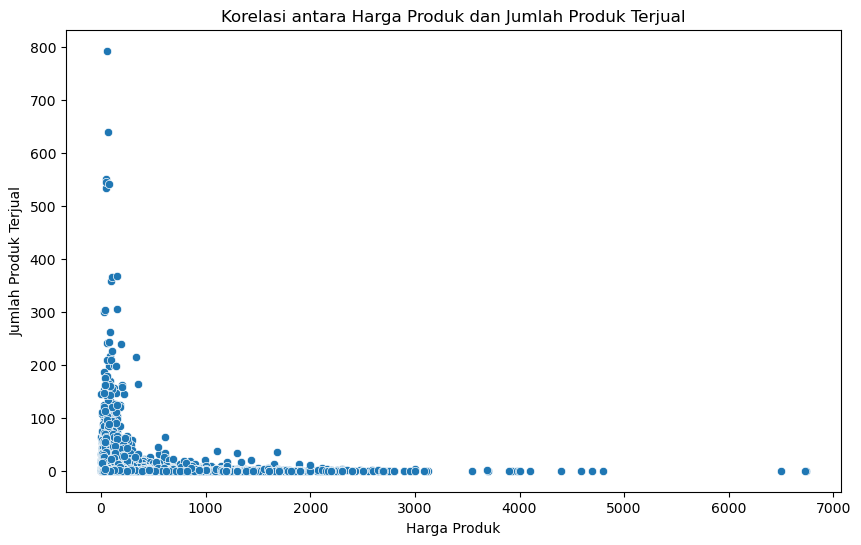

In [27]:
# Mengelompokkan produk berdasarkan nama produk dan menghitung jumlah penjualan serta total pendapatan
produk_terjual = items.groupby('product_id').agg({'order_item_id': 'sum', 'price': 'first'}).reset_index()
produk_terjual = pd.merge(produk_terjual, products[['product_id', 'product_category_name']], on='product_id', how='left')
produk_terjual = produk_terjual.rename(columns={'product_category_name': 'product_name'})
produk_terjual['total_pendapatan'] = produk_terjual['order_item_id'] * produk_terjual['price']

# Menghapus duplikat produk
produk_terjual.drop_duplicates(subset=['product_id'], inplace=True)

# Menampilkan produk terlaris dengan nama produknya
produk_terlaris = produk_terjual.sort_values(by='order_item_id', ascending=False).head(10)
print("Produk Terlaris:")
print(produk_terlaris)

# Visualisasi korelasi antara harga produk dan jumlah produk terjual
plt.figure(figsize=(10, 6))
sns.scatterplot(data=produk_terjual, x='price', y='order_item_id')
plt.title('Korelasi antara Harga Produk dan Jumlah Produk Terjual')
plt.xlabel('Harga Produk')
plt.ylabel('Jumlah Produk Terjual')
plt.show()


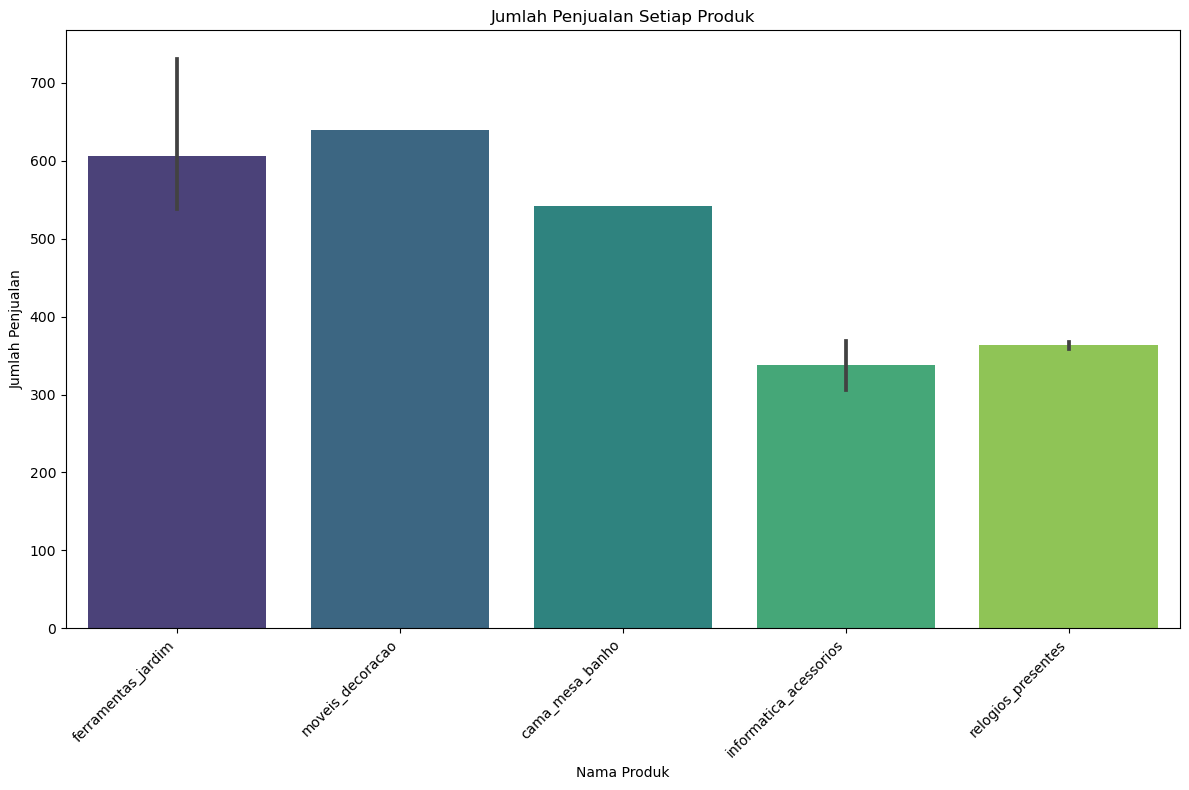

In [58]:
# Visualisasi jumlah penjualan setiap produk
plt.figure(figsize=(12, 8))
sns.barplot(data=produk_terlaris, x='product_name', y='order_item_id', palette='viridis')
plt.title('Jumlah Penjualan Setiap Produk')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 5.2 Bagaimana distribusi geografis pelanggan dan penjual?

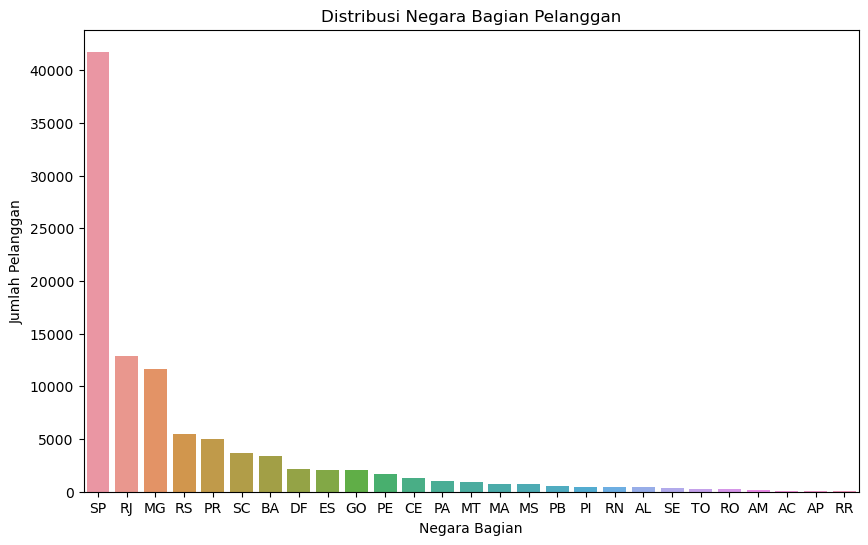

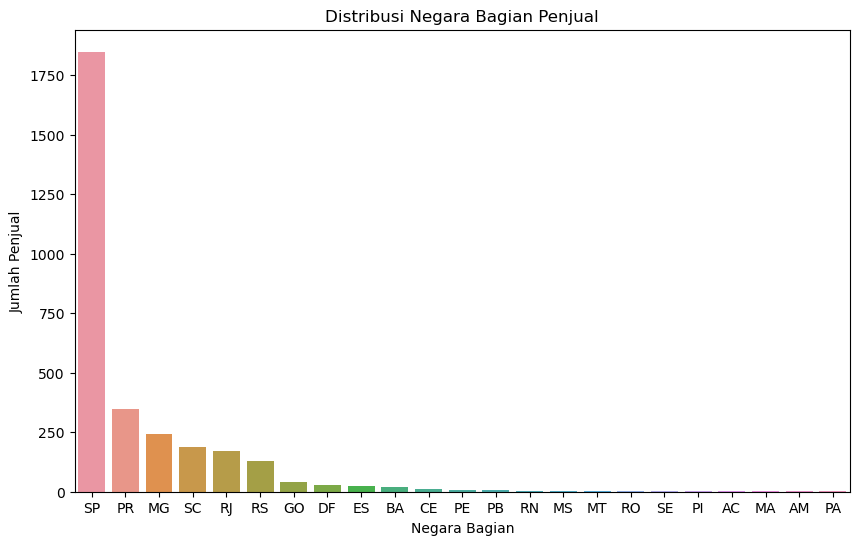

In [28]:
# Melihat distribusi negara bagian pelanggan
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='customer_state', order=customers['customer_state'].value_counts().index)
plt.title('Distribusi Negara Bagian Pelanggan')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Melihat distribusi negara bagian penjual
plt.figure(figsize=(10, 6))
sns.countplot(data=sellers, x='seller_state', order=sellers['seller_state'].value_counts().index)
plt.title('Distribusi Negara Bagian Penjual')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Penjual')
plt.show()


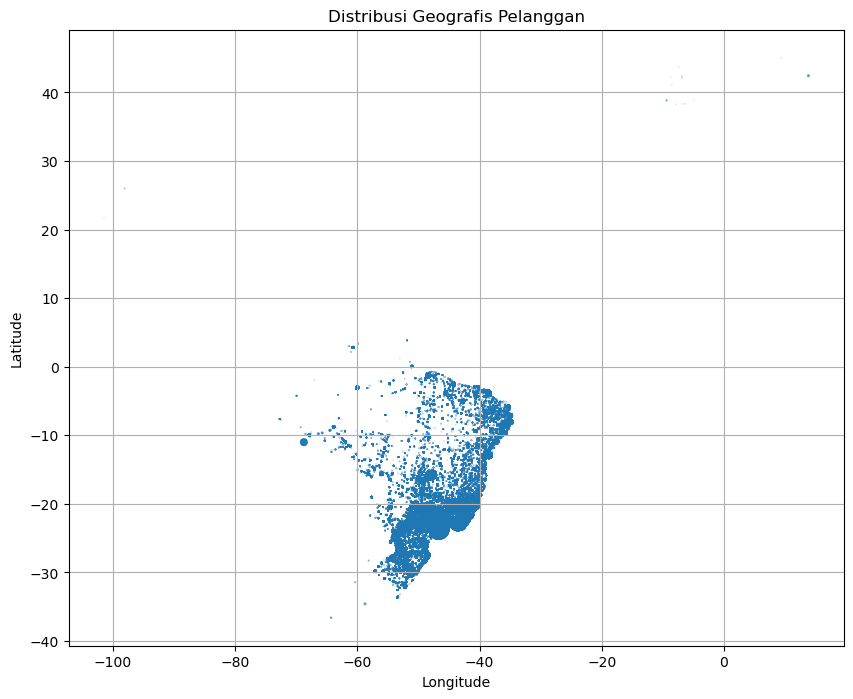

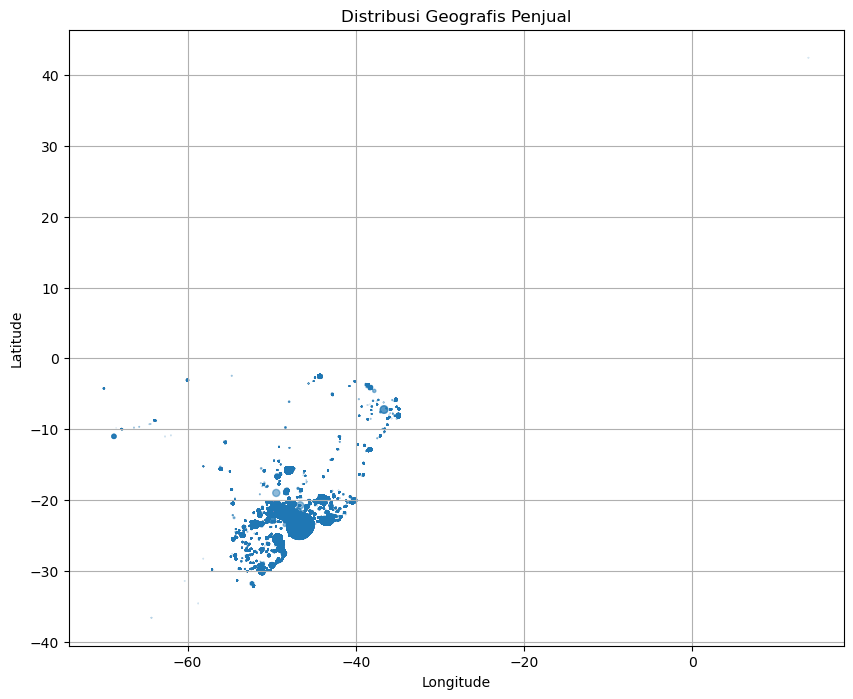

In [29]:
# Gabungkan dataset orders dan customers untuk mendapatkan lokasi pelanggan
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')

# Hitung jumlah transaksi untuk setiap lokasi geografis pelanggan
transaksi_per_lokasi_pelanggan = orders_customers.groupby('customer_city').size().reset_index(name='jumlah_transaksi_pelanggan')

# Gabungkan dengan data geografis
data_geo_pelanggan = pd.merge(geolocation, transaksi_per_lokasi_pelanggan, how='left', left_on='geolocation_city', right_on='customer_city')

# Gabungkan dataset customers dan sellers untuk mendapatkan lokasi penjual
orders_sellers = pd.merge(items, sellers, on='seller_id', how='left')

# Hitung jumlah transaksi untuk setiap lokasi geografis penjual
transaksi_per_lokasi_penjual = orders_sellers.groupby('seller_city').size().reset_index(name='jumlah_transaksi_penjual')

# Gabungkan dengan data geografis
data_geo_penjual = pd.merge(geolocation, transaksi_per_lokasi_penjual, how='left', left_on='geolocation_city', right_on='seller_city')

# Visualisasi peta distribusi geografis pelanggan
plt.figure(figsize=(10, 8))
plt.scatter(data_geo_pelanggan['geolocation_lng'], data_geo_pelanggan['geolocation_lat'], s=data_geo_pelanggan['jumlah_transaksi_pelanggan']/100, alpha=0.5)
plt.title('Distribusi Geografis Pelanggan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Visualisasi peta distribusi geografis penjual
plt.figure(figsize=(10, 8))
plt.scatter(data_geo_penjual['geolocation_lng'], data_geo_penjual['geolocation_lat'], s=data_geo_penjual['jumlah_transaksi_penjual']/100, alpha=0.5)
plt.title('Distribusi Geografis Penjual')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Conclusion

*   Produk mana yang paling banyak terjual? Apakah ada hubungan antara harga produk dan jumlah produk yang dijual?
  > Produk yang paling banyak terjual ialah ferramentas_jardim. Berdasarkan grafik yang telah ditampilkan, hubungan antara harga produk dan jumlah produk yang dijual ialah berhubungan dengan semakin murah harga produk maka **semakin tinggi** penjualan produk tersebut.

*   Bagaimana distribusi geografis pelanggan dan penjual?
  > Baik pelanggan maupun penjual, mayoritas berada di negara bagian **Tenggara dan Selatan**, tepatnya berada di **SP, RJ, dan MG**.